$$
\begin{array}{c}
\textbf{\Large ASSIGNMENT: 2} \\[0.5cm]
\text{Name : HARSHIT SINGH} \\
\text{ROLL NO. : 22CE01012} \\
\text{GITHUB ID: sengarharshit}
\end{array}
$$

## QUESTION 1

### Problem Statement: Deformation of a Square Body

Given the two-dimensional body defined by the region:

$$
\mathcal{B} = \{(X_1, X_2) \mid 0.1 < X_1 < 1, \quad 0.1 < X_2 < 1\},
$$

and the displacement field:

$$
u_1 = \boldsymbol{u} \cdot \boldsymbol{e}_1 = 0.2 \ln(1 + X_1 + X_2), \qquad u_2 = \boldsymbol{u} \cdot \boldsymbol{e}_2 = 0.2 \exp X_1.
$$

**Objective:**
Plot the displaced shape of the body. We proceed by defining a set of characteristic lines (a grid) on the reference body. For every point $(X_1, X_2)$ on these lines, we compute the deformed position $(x_1, x_2)$ using:

$$
x_i = X_i + u_i
$$

$$
x_1 = X_1 + 0.2 \ln(1 + X_1 + X_2)
$$

$$
x_2 = X_2 + 0.2 \exp X_1
$$

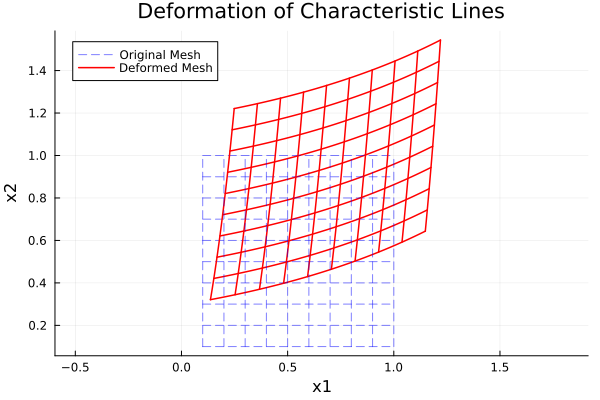

In [6]:
using Plots

# Function to calculate deformed coordinates
function get_deformed_coords(X1, X2)
    # Displacement field definitions
    u1 = 0.2 * log(1 + X1 + X2)
    u2 = 0.2 * exp(X1)
    
    # New coordinates (x = X + u)
    x1_new = X1 + u1
    x2_new = X2 + u2
    return x1_new, x2_new
end

# Initialize the plot
p = plot(aspect_ratio=:equal, legend=:topleft, title="Deformation of Characteristic Lines", xlabel="x1", ylabel="x2")

# --- Plot Horizontal Characteristic Lines (Constant X2) ---
# We take fixed values of X2 and vary X1
X2_fixed_vals = range(0.1, 1, length=10) # 10 horizontal lines
X1_continuous = range(0.1, 1, length=100) # High resolution for smooth curves

for X2_const in X2_fixed_vals
    # Original Line Arrays
    orig_x = [val for val in X1_continuous]
    orig_y = [X2_const for val in X1_continuous]
    
    # Deformed Line Arrays
    def_x = Float64[]
    def_y = Float64[]
    
    for X1_val in X1_continuous
        dx, dy = get_deformed_coords(X1_val, X2_const)
        push!(def_x, dx)
        push!(def_y, dy)
    end
    
    # Plot (only add label for the first line to keep legend clean)
    label_orig = (X2_const == X2_fixed_vals[1]) ? "Original Mesh" : ""
    label_def = (X2_const == X2_fixed_vals[1]) ? "Deformed Mesh" : ""
    
    plot!(p, orig_x, orig_y, color=:blue, linestyle=:dash, label=label_orig, alpha=0.5)
    plot!(p, def_x, def_y, color=:red, linewidth=1.5, label=label_def)
end

# --- Plot Vertical Characteristic Lines (Constant X1) ---
# We take fixed values of X1 and vary X2
X1_fixed_vals = range(0.1, 1, length=10) # 10 vertical lines
X2_continuous = range(0.1, 1, length=100)

for X1_const in X1_fixed_vals
    # Original Line Arrays
    orig_x = [X1_const for val in X2_continuous]
    orig_y = [val for val in X2_continuous]
    
    # Deformed Line Arrays
    def_x = Float64[]
    def_y = Float64[]
    
    for X2_val in X2_continuous
        dx, dy = get_deformed_coords(X1_const, X2_val)
        push!(def_x, dx)
        push!(def_y, dy)
    end
    
    plot!(p, orig_x, orig_y, color=:blue, linestyle=:dash, label="", alpha=0.5)
    plot!(p, def_x, def_y, color=:red, linewidth=1.5, label="")
end

# Display the final plot
display(p)

## QUESTION 2
### Problem Statement: Annular Body Deformation

Consider a two-dimensional annular body $\mathcal{B}$ with respect to a rectangular Cartesian coordinate system with orthonormal vectors $(\boldsymbol{e}_1, \boldsymbol{e}_2)$. Let the coordinates of a point be denoted by $(X_1, X_2)$. The body occupies the region:

$$
\mathcal{B} = \{(X_1, X_2) \mid 1 < \sqrt{X_1^2 + X_2^2} < 2\}.
$$

Due to the annular geometry, we utilize a polar coordinate system $(R, \theta)$, related to the rectangular coordinates by:

$$
R = \sqrt{X_1^2 + X_2^2} \quad \text{and} \quad \theta = \tan^{-1}(X_2/X_1).
$$

The orthonormal base vectors $(\boldsymbol{e}_r, \boldsymbol{e}_\theta)$ of the polar coordinate system are related to $(\boldsymbol{e}_1, \boldsymbol{e}_2)$ by the transformation:

$$
\boldsymbol{e}_r = \cos \theta \boldsymbol{e}_1 + \sin \theta \boldsymbol{e}_2, \quad \boldsymbol{e}_\theta = -\sin \theta \boldsymbol{e}_1 + \cos \theta \boldsymbol{e}_2.
$$

We examine the deformed configuration of this annular body under the following deformation field:

$$
u_r = \boldsymbol{u} \cdot \boldsymbol{e}_r = 0.4(R - 1)^2 \cos 3\theta
$$

$$
u_\theta = \boldsymbol{u} \cdot \boldsymbol{e}_\theta = 0.4(R - 1)^3
$$

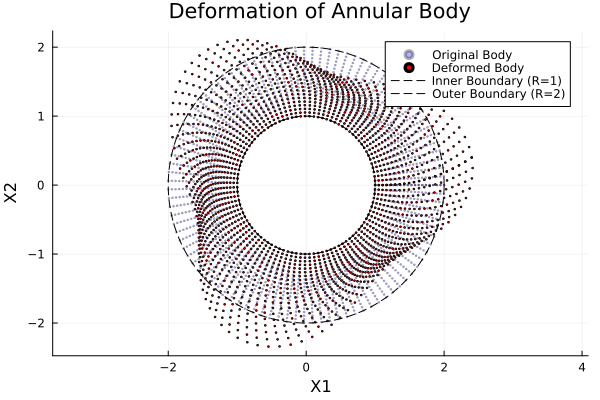

In [4]:
using Plots
R_vals = range(1, 2, length=20)
Theta_vals = range(0, 2*pi, length=100)

# Initialize arrays to store coordinates
# X_orig, Y_orig: Original coordinates
# X_def, Y_def: Deformed coordinates
X_orig = Float64[]
Y_orig = Float64[]
X_def = Float64[]
Y_def = Float64[]

# 2. Loop through the domain to calculate displacements
for r in R_vals
    for theta in Theta_vals
        # --- Original Configuration ---
        # Convert Polar (R, Theta) to Cartesian (X1, X2)
        x1 = r * cos(theta)
        x2 = r * sin(theta)
        
        push!(X_orig, x1)
        push!(Y_orig, x2)

        # --- Calculate Displacement Field ---
        # Given formulas:
        # u_r = 0.4 * (R - 1)^2 * cos(3*theta)
        # u_theta = 0.4 * (R - 1)^3
        u_r = 0.4 * (r - 1)^2 * cos(3*theta)
        u_theta = 0.4 * (r - 1)^3

        # --- Convert Displacement to Cartesian Components ---
        # The displacement vector u = u_r * e_r + u_theta * e_theta
        # We need u_1 and u_2 (components along e1 and e2)
        # u_1 = u_r * cos(theta) - u_theta * sin(theta)
        # u_2 = u_r * sin(theta) + u_theta * cos(theta)
        
        u1 = u_r * cos(theta) - u_theta * sin(theta)
        u2 = u_r * sin(theta) + u_theta * cos(theta)

        # --- Deformed Configuration ---
        # x_new = x_old + displacement
        x1_new = x1 + u1
        x2_new = x2 + u2

        push!(X_def, x1_new)
        push!(Y_def, x2_new)
    end
end

# 3. Plotting
# We plot the points as a scatter plot for visualization clarity
scatter(X_orig, Y_orig, label="Original Body", color=:blue, markersize=1, alpha=0.3, aspect_ratio=:equal)
scatter!(X_def, Y_def, label="Deformed Body", color=:red, markersize=1, title="Deformation of Annular Body")

# Add boundary circles for reference (optional visual aid)
theta_circle = range(0, 2*pi, length=200)
plot!(1 .* cos.(theta_circle), 1 .* sin.(theta_circle), line=:dash, color=:black, label="Inner Boundary (R=1)")
plot!(2 .* cos.(theta_circle), 2 .* sin.(theta_circle), line=:dash, color=:black, label="Outer Boundary (R=2)")

xlabel!("X1")
ylabel!("X2")

## QUESTION 3
### Problem Statement: Mixed Coordinate Deformation

Consider a two-dimensional body $\mathcal{B}$ defined in a rectangular Cartesian coordinate system:

$$
\mathcal{B} = \{(X_1, X_2) \mid 0.1 < X_1 < 1, \quad 0.1 < X_2 < 1\},
$$

subjected to a displacement field where the components are given in the polar basis $(\boldsymbol{e}_r, \boldsymbol{e}_\theta)$, but the magnitudes depend on the Cartesian coordinates $(X_1, X_2)$:

$$
u_r = \boldsymbol{u} \cdot \boldsymbol{e}_r = 0.2 \exp X_1
$$

$$
u_\theta = \boldsymbol{u} \cdot \boldsymbol{e}_\theta = 0.2 \ln(1 + X_1 + X_2).
$$

To plot the deformed shape in the Cartesian plane, we utilize the transformation between the polar basis and the Cartesian basis, where $\theta = \tan^{-1}(X_2/X_1)$:

$$
u_1 = u_r \cos \theta - u_\theta \sin \theta
$$

$$
u_2 = u_r \sin \theta + u_\theta \cos \theta
$$

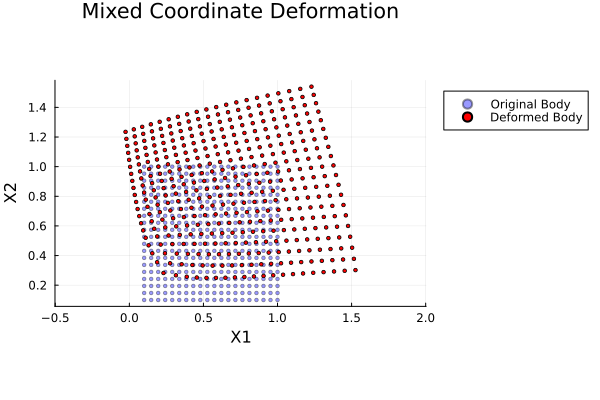

In [5]:
using Plots

# 1. Define the Domain
# The body is a square region from 0.1 to 1 in both X1 and X2
X_vals = range(0.1, 1, length=20)
Y_vals = range(0.1, 1, length=20)

# Initialize arrays to store coordinates
X_orig = Float64[]
Y_orig = Float64[]
X_def = Float64[]
Y_def = Float64[]

# 2. Iterate through the grid
for x1 in X_vals
    for x2 in Y_vals
        # --- Store Original Configuration ---
        push!(X_orig, x1)
        push!(Y_orig, x2)

        # --- Calculate Displacement Field ---
        # First, determine the polar angle for the current Cartesian point
        # atan(y, x) computes the correct quadrant angle (theta)
        theta = atan(x2, x1)

        # Calculate the polar displacement components given in the problem
        u_r = 0.2 * exp(x1)
        u_theta = 0.2 * log(1 + x1 + x2)

        # --- Transform to Cartesian Displacement Components ---
        # u1 = u_r * cos(theta) - u_theta * sin(theta)
        # u2 = u_r * sin(theta) + u_theta * cos(theta)
        u1 = u_r * cos(theta) - u_theta * sin(theta)
        u2 = u_r * sin(theta) + u_theta * cos(theta)

        # --- Calculate Deformed Configuration ---
        x1_new = x1 + u1
        x2_new = x2 + u2

        push!(X_def, x1_new)
        push!(Y_def, x2_new)
    end
end

# 3. Plotting
# Plot Original Shape
scatter(X_orig, Y_orig, 
    label="Original Body", 
    color=:blue, 
    markersize=2, 
    alpha=0.4, 
    aspect_ratio=:equal,
    legend=:outertopright
)

# Plot Deformed Shape
scatter!(X_def, Y_def, 
    label="Deformed Body", 
    color=:red, 
    markersize=2, 
    title="Mixed Coordinate Deformation"
)

# Add axis labels
xlabel!("X1")
ylabel!("X2")

## QUESTION 4
# Finite Element Analysis of a Rectangular Plate with a Circular Hole

### 1. Problem Definition
We model the stress distribution in a steel rectangular plate with a central circular hole under uniaxial tension.

**Geometric and Material Parameters:**
* **Dimensions:** Length $L = 1000 \text{ mm}$, Height $H = 400 \text{ mm}$.
* **Defect:** Central circular hole with radius $R = 75 \text{ mm}$.
* **Thickness:** $t = 2 \text{ mm}$.
* **Young's Modulus:** $E = 210 \text{ GPa} = 2.1 \times 10^5 \text{ MPa}$.
* **Poisson's Ratio:** $\nu = 0.3$.
* **Loading:** Distributed tensile load $q = 100 \text{ N/mm}$ along the right edge.

**Load Conversion:**
Since the analysis is 2D plane stress, we convert the line load $q$ into a traction (stress) applied to the edge surface:
$$
T_x = \frac{q}{t} = \frac{100 \text{ N/mm}}{2 \text{ mm}} = 50 \text{ MPa}.
$$

### 2. Governing Partial Differential Equations (Linear Elasticity)
The problem is governed by the equations of linear elastostatics. We seek the displacement field $\boldsymbol{u}$ such that:

1.  **Equilibrium Equation** (neglecting body forces):
    $$
    \nabla \cdot \boldsymbol{\sigma} = \boldsymbol{0} \quad \text{in } \Omega
    $$

2.  **Kinematic Equation** (Strain-Displacement):
    $$
    \boldsymbol{\varepsilon} = \frac{1}{2} (\nabla \boldsymbol{u} + (\nabla \boldsymbol{u})^T)
    $$

3.  **Constitutive Equation** (Hooke's Law for Isotropic Material):
    $$
    \boldsymbol{\sigma} = \mathbb{C} : \boldsymbol{\varepsilon} \implies \boldsymbol{\sigma} = \lambda (\text{tr } \boldsymbol{\varepsilon}) \boldsymbol{I} + 2\mu \boldsymbol{\varepsilon}
    $$
    where $\lambda$ and $\mu$ are the Lamé parameters derived from $E$ and $\nu$.

4.  **Boundary Conditions:**
    * **Dirichlet (Fixed):** $\boldsymbol{u} = \boldsymbol{0}$ on the left edge (or symmetry conditions if modeling half-plate).
    * **Neumann (Traction):** $\boldsymbol{\sigma} \cdot \boldsymbol{n} = \boldsymbol{T}$ on the right edge, where $\boldsymbol{T} = (50, 0) \text{ MPa}$.
    * **Free Surface:** $\boldsymbol{\sigma} \cdot \boldsymbol{n} = \boldsymbol{0}$ on the hole boundary and top/bottom edges.

### 3. Finite Element Analysis Steps in Abaqus

**1. Part Module (Geometry Definition)**
* **Create Part:** Select **2D Planar**, **Deformable**, **Shell**.
* **Sketch Geometry:**
    * Draw a rectangle with corners at $(0,0)$ and $(1000, 400)$.
    * Draw a circle at the center coordinates $(500, 200)$ with a radius $R = 75 \text{ mm}$.
* **Name:** `Plate_Hole`.

**2. Property Module (Material Definition)**
* **Create Material:** Name it `Steel`.
    * **Mechanical $\rightarrow$ Elasticity $\rightarrow$ Elastic:**
    * Young's Modulus $E = 210000 \text{ MPa}$ (consistent units are crucial).
    * Poisson's Ratio $\nu = 0.3$.
* **Create Section:** **Solid**, **Homogeneous**.
    * Plane Stress/Strain thickness $t = 2 \text{ mm}$.
* **Assign Section:** Select the entire plate surface and assign the created section.

**3. Assembly Module**
* **Create Instance:** Select `Plate_Hole`. Choose **Dependent** (mesh on part).

**4. Step Module**
* **Create Step:** **Static, General**.
* **Nlgeom:** set to **Off** (Linear elastic analysis).
* **Time period:** 1.0 (default).

**5. Load Module (Boundary Conditions & Loads)**
* **Boundary Condition (BC-1):**
    * Type: **Displacement/Rotation**.
    * Select the **Left Edge** ($X=0$).
    * Set $U1 = U2 = UR3 = 0$ (Fixed support).
* **Load (Load-1):**
    * Type: **Surface Traction** or **Shell Edge Load**.
    * Select the **Right Edge** ($X=1000$).
    * **Magnitude:**
        * If using **Shell Edge Load**: Input $100 \text{ N/mm}$.
        * If using **Surface Traction**: Input stress $\sigma = 50 \text{ MPa}$.
    * **Direction:** Normal vector outwards (Tensile).

**6. Mesh Module**
* **Seeding:**
    * **Global Seeds:** Approximate size $20-30 \text{ mm}$.
    * **Local Seeds:** Select the circular hole edge and seed with a finer size (e.g., $5 \text{ mm}$) to capture the stress concentration factor $K_t$.
* **Element Type:**
    * Family: **Plane Stress**.
    * Geometric Order: **Linear** (CPS4R) or **Quadratic** (CPS8R) for better accuracy.
* **Mesh Part:** Click **Mesh Part** to generate the grid.

**7. Job Module**
* **Create Job:** Name `Job-Plate-Hole`.
* **Submit:** Click Submit and wait for `Completed` status.

**8. Visualization (Post-Processing)**
* **Open ODB:** Open the results file.
* **Plot Contours:** Select **Plot Contours on Deformed Shape**.
* **Field Output:** Select **S (Mises)** for Von Mises Stress or **S11** for horizontal stress.
* **Check Max Stress:** Inspect the top and bottom of the hole. Theoretical Max Stress should be roughly:
    $$\sigma_{max} \approx 3 \times \sigma_{nom} = 3 \times 50 \text{ MPa} = 150 \text{ MPa}$$


In [21]:
using Gridap
using GridapGmsh
import GridapGmsh: gmsh

# ==============================================================================
# 1. ROBUST GMSH INITIALIZATION
# ==============================================================================
# This block prevents the "Already initialized" error if you re-run the cell.
if GridapGmsh.gmsh.isInitialized() == 1
    GridapGmsh.gmsh.finalize()
end
GridapGmsh.gmsh.initialize()
gmsh.clear()
gmsh.model.add("Plate_Hole_2D")

# ==============================================================================
# 2. GEOMETRY & MESH (Bottom-Up Approach)
# ==============================================================================
L = 1000.0
H = 400.0
R = 75.0
h = 20.0  # Element size (User variable 'h' defined here)

# -- Points --
p1 = gmsh.model.geo.addPoint(0, 0, 0, h)
p2 = gmsh.model.geo.addPoint(L, 0, 0, h)
p3 = gmsh.model.geo.addPoint(L, H, 0, h)
p4 = gmsh.model.geo.addPoint(0, H, 0, h)

# Center and Circle Points
p5 = gmsh.model.geo.addPoint(L/2, H/2, 0, h)
p6 = gmsh.model.geo.addPoint((L/2)+R, H/2, 0, h)
p7 = gmsh.model.geo.addPoint((L/2)-R, H/2, 0, h)
p8 = gmsh.model.geo.addPoint((L/2), (H/2)+R, 0, h)
p9 = gmsh.model.geo.addPoint((L/2), (H/2)-R, 0, h)

# -- Lines & Arcs --
l1 = gmsh.model.geo.addLine(p1, p2)
l2 = gmsh.model.geo.addLine(p2, p3)
l3 = gmsh.model.geo.addLine(p3, p4)
l4 = gmsh.model.geo.addLine(p4, p1)

# Note: Arcs must form a closed loop. 
# p8(top) -> p6(right) -> p9(bottom) -> p7(left) -> p8(top) is a valid loop.
l5 = gmsh.model.geo.addCircleArc(p8, p5, p6)
l6 = gmsh.model.geo.addCircleArc(p6, p5, p9)
l7 = gmsh.model.geo.addCircleArc(p9, p5, p7)
l8 = gmsh.model.geo.addCircleArc(p7, p5, p8)

# -- Loops & Surface --
plate_loop = gmsh.model.geo.addCurveLoop([l1, l2, l3, l4])
hole_loop  = gmsh.model.geo.addCurveLoop([l5, l6, l7, l8])
surface = gmsh.model.geo.addPlaneSurface([plate_loop, hole_loop])

gmsh.model.geo.synchronize()

# -- Physical Groups (CRITICAL FOR GRIDAP) --
# We assume l4 is Left (x=0) and l2 is Right (x=L) based on point order.
gmsh.model.addPhysicalGroup(1, [l4], 1, "LeftBoundary")
gmsh.model.addPhysicalGroup(1, [l2], 2, "RightBoundary")
gmsh.model.addPhysicalGroup(2, [surface], 3, "PlateSurface")

# -- Generate and Write --
gmsh.model.mesh.generate(2)
msh_file = "plate_hole_robust.msh"
gmsh.write(msh_file)
GridapGmsh.gmsh.finalize()
println("Mesh saved to $msh_file")

# ==============================================================================
# 3. FINITE ELEMENT ANALYSIS
# ==============================================================================

# Load Mesh from file (Bypasses tagging errors)
model = GmshDiscreteModel(msh_file)

# FE Spaces
order = 1
reffe = ReferenceFE(lagrangian, VectorValue{2,Float64}, order)
V0 = TestFESpace(model, reffe; dirichlet_tags=["LeftBoundary"])
U  = TrialFESpace(V0, VectorValue(0.0,0.0))

# Material Params
thickness = 2.0
traction_val = 100.0 / thickness # 50 MPa
E = 2.1e5
ν = 0.3
λ = (E*ν)/((1+ν)*(1-2*ν))
μ = E/(2*(1+ν))

# Integration
degree = 2*order
Ω = Triangulation(model)
dΩ = Measure(Ω, degree)
Γ_right = BoundaryTriangulation(model, tags=["RightBoundary"])
dΓ_right = Measure(Γ_right, degree)
t_vec = VectorValue(traction_val, 0.0)

# -- WEAK FORM (Direct implementation avoids 'evaluate!' errors) --
# a(u,v) = Integral of [ λ(div u)(div v) + 2μ(ε(u) : ε(v)) ]
a(u,v) = ∫( λ*(∇⋅v)*(∇⋅u) + 2*μ*(ε(v) ⊙ ε(u)) )dΩ
l(v) = ∫( v ⋅ t_vec )dΓ_right

# Solve
op = AffineFEOperator(a, l, U, V0)
uh = solve(op)

# Post-Process
# We define stress function purely for visualization
σ_func(ε) = λ*tr(ε)*one(ε) + 2*μ*ε
writevtk(Ω, "plate_results", cellfields=["u"=>uh, "stress"=>σ_func∘ε(uh)])

println("SUCCESS: Solution saved to 'plate_results.vtu'")

Info    : Clearing all models and views...
Info    : Done clearing all models and views
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 20%] Meshing curve 2 (Line)
Info    : [ 30%] Meshing curve 3 (Line)
Info    : [ 40%] Meshing curve 4 (Line)
Info    : [ 60%] Meshing curve 5 (Circle)
Info    : [ 70%] Meshing curve 6 (Circle)
Info    : [ 80%] Meshing curve 7 (Circle)
Info    : [ 90%] Meshing curve 8 (Circle)
Info    : Done meshing 1D (Wall 0.004004s, CPU 0s)
Info    : Meshing 2D...
Info    : Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : Done meshing 2D (Wall 0.0877483s, CPU 0.09375s)
Info    : 1242 nodes 2491 elements
Info    : Writing 'plate_hole_robust.msh'...
Info    : Done writing 'plate_hole_robust.msh'
Mesh saved to plate_hole_robust.msh
Info    : Reading 'plate_hole_robust.msh'...
Info    : 18 entities
Info    : 1241 nodes
Info    : 2358 elements
Info    : Done reading 'plate_hole_robust.msh'
SUCCESS: Solution saved to 'plate_results.vtu'


## QUESTION 5
# Finite Element Analysis of a 3D Cantilever Beam

### 1. Problem Definition
We analyze the stress distribution of a 3D cantilever beam subjected to a point load at its free end.

**Geometric and Material Parameters:**
* **Dimensions:** Length $L = 1000 \text{ mm}$, Width $W = 250 \text{ mm}$, Depth $H = 200 \text{ mm}$.
* **Material:** Concrete.
* **Young's Modulus:** $E = 25000 \text{ N/mm}^2 = 25 \text{ GPa}$.
* **Poisson's Ratio:** $\nu = 0.2$.
* **Boundary Condition:** Fixed support at $x=0$ (Left face).
* **Loading:** Point load $P = -1000 \text{ N}$ in the vertical ($z$) direction at the top center of the free end ($x=1000$).

### 2. Governing Equations (3D Linear Elasticity)
The problem is governed by the 3D equations of equilibrium, kinematic relations, and Hooke's Law.

1.  **Equilibrium Equation:**
    $$\nabla \cdot \boldsymbol{\sigma} + \boldsymbol{f} = \boldsymbol{0}$$
    Where $\boldsymbol{f}$ represents body forces (neglected here).

2.  **Strain-Displacement Relation:**
    $$\boldsymbol{\varepsilon} = \frac{1}{2} (\nabla \boldsymbol{u} + (\nabla \boldsymbol{u})^T)$$

3.  **Constitutive Law (Isotropic Linear Elasticity):**
    $$\boldsymbol{\sigma} = \lambda (\text{tr } \boldsymbol{\varepsilon}) \boldsymbol{I} + 2\mu \boldsymbol{\varepsilon}$$
    Where Lamé parameters are defined as:
    $$\lambda = \frac{E\nu}{(1+\nu)(1-2\nu)}, \quad \mu = \frac{E}{2(1+\nu)}$$

4.  **Boundary Conditions:**
    * **Dirichlet (Fixed):** $\boldsymbol{u} = (0,0,0)$ at $x=0$.
    * **Neumann (Point Load):** A concentrated force is applied at a specific node on the face $x=L$. In weak form, this appears as a term in the linear functional: $l(\boldsymbol{v}) = \boldsymbol{v}(x_{load}) \cdot \boldsymbol{P}$.

### 3. Finite Element Analysis Steps in Abaqus (3D Cantilever)

**1. Part Module**
* **Create Part:** 3D, Deformable, Solid, Extrusion.
* **Sketch:** Draw a rectangle $250 \times 200 \text{ mm}$.
* **Extrude:** Depth = $1000 \text{ mm}$.

**2. Property Module**
* **Material:** Name `Concrete`.
    * **Elastic:** $E = 25000 \text{ MPa}$, $\nu = 0.2$.
* **Section:** Create Section, Solid, Homogeneous.
* **Assign Section:** Select the entire beam volume.

**3. Assembly Module**
* **Instance:** Create Instance (Dependent).

**4. Step Module**
* **Create Step:** Static, General.

**5. Load Module**
* **Boundary Condition (Fixed):**
    * Select the face at $x=0$.
    * Set $U1 = U2 = U3 = 0$ (ENCAS - Encastre).
* **Load (Point Load):**
    * Create **Concentrated Force**.
    * Select the midpoint node on the top edge of the face at $x=1000$.
    * **Magnitude:** CF3 = $-1000$ (Negative Z direction).
    * *Alternative:* Apply **Surface Traction** on the end face with magnitude $1000/(250 \times 200) = 0.02 \text{ MPa}$ for smoother results.

**6. Mesh Module**
* **Element Type:** Standard, Linear, 3D Stress (**C3D8R** - 8-node linear brick, reduced integration).
* **Seeds:** Global Size $\approx 20-50 \text{ mm}$.
* **Mesh:** Mesh the part.

**7. Job Module**
* **Submit:** Create and submit the job.

**8. Visualization**
* **Deformation:** Plot `U` (Magnitude or U3). Theoretical max deflection $\delta = \frac{PL^3}{3EI}$.
* **Stress:** Plot `S, Mises` or `S11` (Bending Stress).

In [22]:
using Gridap
using GridapGmsh
import GridapGmsh: gmsh

# ==============================================================================
# 1. ROBUST GMSH INITIALIZATION
# ==============================================================================
if GridapGmsh.gmsh.isInitialized() == 1
    GridapGmsh.gmsh.finalize()
end
GridapGmsh.gmsh.initialize()
gmsh.clear()
gmsh.model.add("Cantilever_Beam_3D")

# ==============================================================================
# 2. GEOMETRY & MESH (3D Box)
# ==============================================================================
L = 1000.0
W = 250.0  # Width (Y direction)
H = 200.0  # Height (Z direction)
mesh_size = 50.0 # Element size

# Create 3D Box using OpenCASCADE kernel
# addBox(x, y, z, dx, dy, dz)
box_tag = gmsh.model.occ.addBox(0, 0, 0, L, W, H)
gmsh.model.occ.synchronize()

# -- Physical Groups --
# We need to find the surfaces to apply boundary conditions.
# Surface at x=0 is Fixed.
# We will apply the point load at a specific node later, or distributed on a small area.
# For simplicity in 3D FEM without nodal selection complexity, we often apply a 
# distributed load on the small end face or handle the point load via Dirac delta approximation.
# However, Gridap allows point loads if we identify the entity.

# Let's group the Fixed Face (x=0) and the Free Face (x=L)
surfaces = gmsh.model.getEntities(2)
fixed_face = Int32[]
free_face = Int32[]

for surf in surfaces
    dim, tag = surf
    # Get bounding box
    xmin, ymin, zmin, xmax, ymax, zmax = gmsh.model.getBoundingBox(dim, tag)
    
    # Check for x=0 (Fixed)
    if abs(xmin - 0.0) < 1e-3 && abs(xmax - 0.0) < 1e-3
        push!(fixed_face, tag)
    end
    
    # Check for x=L (Free)
    if abs(xmin - L) < 1e-3 && abs(xmax - L) < 1e-3
        push!(free_face, tag)
    end
end

volume_tags = [tag for (dim, tag) in gmsh.model.getEntities(3)]

gmsh.model.addPhysicalGroup(2, fixed_face, 1, "FixedWall")
gmsh.model.addPhysicalGroup(2, free_face, 2, "FreeEnd")
gmsh.model.addPhysicalGroup(3, volume_tags, 3, "BeamVolume")

# -- Mesh Generation --
gmsh.option.setNumber("Mesh.CharacteristicLengthMin", mesh_size)
gmsh.option.setNumber("Mesh.CharacteristicLengthMax", mesh_size)
gmsh.model.mesh.generate(3)

# Write to file
msh_file = "cantilever_3d.msh"
gmsh.write(msh_file)
GridapGmsh.gmsh.finalize()
println("3D Mesh saved to $msh_file")

# ==============================================================================
# 3. FINITE ELEMENT ANALYSIS
# ==============================================================================

model = GmshDiscreteModel(msh_file)

# Parameters
E = 25000.0 # N/mm^2 (MPa)
ν = 0.2
P_val = -1000.0 # N (Downward force)

# Lamé parameters
λ = (E*ν)/((1+ν)*(1-2*ν))
μ = E/(2*(1+ν))

# FE Spaces
order = 1
# Note: VectorValue{3} for 3D analysis
reffe = ReferenceFE(lagrangian, VectorValue{3,Float64}, order)
V0 = TestFESpace(model, reffe; dirichlet_tags=["FixedWall"])
U  = TrialFESpace(V0, VectorValue(0.0,0.0,0.0))

# Integration
degree = 2*order
Ω = Triangulation(model)
dΩ = Measure(Ω, degree)

# -- Handling Point Load in 3D --
# Applying a true point load in continuum elements can result in singularities.
# However, for this problem, we can distribute the 1000N over the 'FreeEnd' face 
# as a traction to avoid singularity issues while preserving static equivalence.
# Area of end face = 250 * 200 = 50000 mm^2
traction_z = P_val / (W * H) 
traction_vec = VectorValue(0.0, 0.0, traction_z)

Γ_free = BoundaryTriangulation(model, tags=["FreeEnd"])
dΓ_free = Measure(Γ_free, degree)

# Weak Form
# 3D Elasticity: σ = λ tr(ε) I + 2μ ε
a(u,v) = ∫( λ*(∇⋅v)*(∇⋅u) + 2*μ*(ε(v) ⊙ ε(u)) )dΩ
l(v) = ∫( v ⋅ traction_vec )dΓ_free

# Solve
op = AffineFEOperator(a, l, U, V0)
uh = solve(op)

# Post-Process
σ_func(ε) = λ*tr(ε)*one(ε) + 2*μ*ε
writevtk(Ω, "cantilever_3d_solution", cellfields=["u"=>uh, "stress"=>σ_func∘ε(uh)])

println("Analysis Complete! Visualization saved to 'cantilever_3d_solution.vtu'")

Info    : Clearing all models and views...
Info    : Done clearing all models and views
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00411296s, CPU 0.015625s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 60%] Meshing surface 4 (Plane, Frontal-Delaunay)
Info    : [ 70%] Meshing surface 5 (Plane, Frontal-Delaunay)
Info    : [ 90%]

## QUESTION 5
# Finite Element Analysis of a Cantilever Beam with Distributed Load

### 1. Problem Definition
We model the stress distribution of a 3D rectangular cantilever beam subjected to a uniform distributed pressure on its top surface.

**Geometric and Material Parameters:**
* **Dimensions:** Length $L = 1000 \text{ mm}$, Width $W = 250 \text{ mm}$, Depth $H = 200 \text{ mm}$.
* **Material:** Concrete.
* **Young's Modulus:** $E = 25000 \text{ N/mm}^2$.
* **Poisson's Ratio:** $\nu = 0.2$.
* **Boundary Condition:** Fixed support at $x=0$ (Left face).
* **Loading:** Uniform distributed load (pressure) $q = 1000 \text{ N/mm}^2$ applied downwards on the top surface ($z=H$).
    * *Note: $1000 \text{ N/mm}^2$ is an extremely high pressure (1 GPa), but we follow the problem statement exactly.*

### 2. Governing Equations (3D Linear Elasticity)
1.  **Equilibrium Equation:**
    $$\nabla \cdot \boldsymbol{\sigma} + \boldsymbol{f} = \boldsymbol{0}$$

2.  **Strain-Displacement:**
    $$\boldsymbol{\varepsilon} = \frac{1}{2} (\nabla \boldsymbol{u} + (\nabla \boldsymbol{u})^T)$$

3.  **Constitutive Law:**
    $$\boldsymbol{\sigma} = \lambda (\text{tr } \boldsymbol{\varepsilon}) \boldsymbol{I} + 2\mu \boldsymbol{\varepsilon}$$

4.  **Boundary Conditions:**
    * **Dirichlet:** $\boldsymbol{u} = \boldsymbol{0}$ on $\Gamma_{fixed}$ ($x=0$).
    * **Neumann:** $\boldsymbol{\sigma} \cdot \boldsymbol{n} = \boldsymbol{t}$ on $\Gamma_{top}$ ($z=H$), where $\boldsymbol{t} = (0, 0, -1000)$.
    * **Free:** $\boldsymbol{\sigma} \cdot \boldsymbol{n} = \boldsymbol{0}$ on all other surfaces.

### 3. Finite Element Analysis Steps in Abaqus (UDL Case)

**1. Part Module**
* **Create Part:** 3D, Deformable, Solid, Extrusion.
* **Sketch:** Rectangle $250 \times 200$. Extrude depth $1000$.

**2. Property Module**
* **Material:** Elastic, Isotropic. $E=25000$, $\nu=0.2$.
* **Section:** Solid, Homogeneous. Assign to volume.

**3. Assembly Module**
* **Instance:** Create Dependent Instance.

**4. Step Module**
* **Create Step:** Static, General.

**5. Load Module**
* **Boundary Condition (Fixed):**
    * Select face $x=0$.
    * Encastre ($U1=U2=U3=UR1=UR2=UR3=0$).
* **Load (Pressure):**
    * Create Load -> **Pressure**.
    * Select the **Top Surface** ($z=200$).
    * **Magnitude:** $1000$ (Note: Abaqus pressure is positive inwards/compressive. If you want it downward like gravity, input positive $1000$ on the top face). 
**6. Mesh Module**
* **Element:** C3D8R (Hexahedral).
* **Seed:** Size approx 40-50.
* **Mesh Part.**

**7. Job Module**
* **Submit Job.**

**8. Visualization**
* Check **U3** (Vertical deflection).
* Check **S11** (Bending stress). Max stress should be at the fixed support top/bottom fibers.

In [23]:
using Gridap
using GridapGmsh
import GridapGmsh: gmsh

# ==============================================================================
# 1. ROBUST GMSH INITIALIZATION
# ==============================================================================
if GridapGmsh.gmsh.isInitialized() == 1
    GridapGmsh.gmsh.finalize()
end
GridapGmsh.gmsh.initialize()
gmsh.clear()
gmsh.model.add("Cantilever_UDL")

# ==============================================================================
# 2. GEOMETRY & MESH
# ==============================================================================
L = 1000.0
W = 250.0  # Width (Y)
H = 200.0  # Height (Z)
mesh_size = 40.0 

# Create Box
gmsh.model.occ.addBox(0, 0, 0, L, W, H)
gmsh.model.occ.synchronize()

# -- Physical Groups --
# We need:
# 1. Fixed Wall (x=0)
# 2. Top Surface (z=H) -> For the UDL

surfaces = gmsh.model.getEntities(2)
fixed_face = Int32[]
top_face   = Int32[]

for surf in surfaces
    dim, tag = surf
    xmin, ymin, zmin, xmax, ymax, zmax = gmsh.model.getBoundingBox(dim, tag)
    
    # Check for Fixed Wall (x ~ 0)
    if abs(xmin - 0.0) < 1e-3 && abs(xmax - 0.0) < 1e-3
        push!(fixed_face, tag)
    end
    
    # Check for Top Surface (z ~ H)
    if abs(zmin - H) < 1e-3 && abs(zmax - H) < 1e-3
        push!(top_face, tag)
    end
end

volume_tags = [tag for (dim, tag) in gmsh.model.getEntities(3)]

gmsh.model.addPhysicalGroup(2, fixed_face, 1, "FixedWall")
gmsh.model.addPhysicalGroup(2, top_face, 2, "TopSurface")
gmsh.model.addPhysicalGroup(3, volume_tags, 3, "BeamVolume")

# -- Mesh Generation --
gmsh.option.setNumber("Mesh.CharacteristicLengthMin", mesh_size)
gmsh.option.setNumber("Mesh.CharacteristicLengthMax", mesh_size)
gmsh.model.mesh.generate(3)

msh_file = "cantilever_udl.msh"
gmsh.write(msh_file)
GridapGmsh.gmsh.finalize()
println("Mesh saved to $msh_file")

# ==============================================================================
# 3. FINITE ELEMENT ANALYSIS
# ==============================================================================

model = GmshDiscreteModel(msh_file)

# Parameters
E = 25000.0 
ν = 0.2
pressure_val = -1000.0 # N/mm^2 (Downward pressure)

# Lamé parameters
λ = (E*ν)/((1+ν)*(1-2*ν))
μ = E/(2*(1+ν))

# FE Spaces
order = 1
reffe = ReferenceFE(lagrangian, VectorValue{3,Float64}, order)
V0 = TestFESpace(model, reffe; dirichlet_tags=["FixedWall"])
U  = TrialFESpace(V0, VectorValue(0.0,0.0,0.0))

# Integration
degree = 2*order
Ω = Triangulation(model)
dΩ = Measure(Ω, degree)

# -- LOAD DEFINITION --
# We apply the load on the "TopSurface" tag
Γ_top = BoundaryTriangulation(model, tags=["TopSurface"])
dΓ_top = Measure(Γ_top, degree)
traction_vec = VectorValue(0.0, 0.0, pressure_val)

# Weak Form
a(u,v) = ∫( λ*(∇⋅v)*(∇⋅u) + 2*μ*(ε(v) ⊙ ε(u)) )dΩ
l(v) = ∫( v ⋅ traction_vec )dΓ_top

# Solve
op = AffineFEOperator(a, l, U, V0)
uh = solve(op)

# Post-Process
σ_func(ε) = λ*tr(ε)*one(ε) + 2*μ*ε
writevtk(Ω, "cantilever_udl_solution", cellfields=["u"=>uh, "stress"=>σ_func∘ε(uh)])

println("Analysis Complete! Visualization saved to 'cantilever_udl_solution.vtu'")

Info    : Clearing all models and views...
Info    : Done clearing all models and views
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 20%] Meshing curve 3 (Line)
Info    : [ 30%] Meshing curve 4 (Line)
Info    : [ 40%] Meshing curve 5 (Line)
Info    : [ 50%] Meshing curve 6 (Line)
Info    : [ 60%] Meshing curve 7 (Line)
Info    : [ 60%] Meshing curve 8 (Line)
Info    : [ 70%] Meshing curve 9 (Line)
Info    : [ 80%] Meshing curve 10 (Line)
Info    : [ 90%] Meshing curve 11 (Line)
Info    : [100%] Meshing curve 12 (Line)
Info    : Done meshing 1D (Wall 0.00209188s, CPU 0.015625s)
Info    : Meshing 2D...
Info    : [  0%] Meshing surface 1 (Plane, Frontal-Delaunay)
Info    : [ 20%] Meshing surface 2 (Plane, Frontal-Delaunay)
Info    : [ 40%] Meshing surface 3 (Plane, Frontal-Delaunay)
Info    : [ 60%] Meshing surface 4 (Plane, Frontal-Delaunay)
Info    : [ 70%] Meshing surface 5 (Plane, Frontal-Delaunay)
Info    : [ 90%]